# Import

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [2]:
import pathlib
import glob
import matplotlib.image as mpimg
import random
import os
import shutil
from glob import glob
from pathlib import Path
from os import listdir
from os.path import isfile, join
from sklearn.metrics import accuracy_score

# CSV Issues

In [4]:
#overall, I did not use the csv files as they had mostly unnecessary information
#they did contain the title which could be very useful for this project
#however I would then need the titles of all the other images I scraped myself

doom = pd.read_csv('doom_crossing_dataset.csv')
animal = pd.read_csv('animal_crossing_dataset.csv')

In [5]:
doom.head()

subreddit      id                                              title    ups  \
0      Doom  gtli3b                                And always remember  39007   
1      Doom  fnj4e5                               Remember to have fun  30071   
2      Doom  gemj1h  Can we please send our appreciacion to the lea...  27189   
3      Doom  fzhpqt  This painting from this subreddit a year ago, ...  22948   
4      Doom  g4v23f  Bethesda, you can still do the right thing her...  19896   

   downs  upvote_ratio  total_awards_received  num_comments   created_utc  \
0      0          0.94                      1           531  1.590872e+09   
1      0          0.96                     10          1158  1.584966e+09   
2      0          0.92                      5           965  1.588780e+09   
3      0          0.97                      1           296  1.586636e+09   
4      0          0.96                     34           956  1.587397e+09   

                                   url           filename  
0  https://i.redd.it/ksn72cinsy151.jpg  ksn72cinsy151.jpg  
1  https://i.redd.it/ik4d2mpi1fo41.jpg  ik4d2mpi1fo41.jpg  
2  https://i.redd.it/y5pddy7h16x41.jpg  y5pddy7h16x41.jpg  
3  https://i.redd.it/jrk0eogay8s41.jpg  jrk0eogay8s41.jpg  
4  https://i.redd.it/7c3lyx28tzt41.jpg  7c3lyx28tzt41.jpg

In [85]:
doom[doom['filename'] == 's'] #filename incorrect - should read s.jpg

filename  class
2411    s.jpg      1

In [7]:
doom[doom['filename'] == 'originals'] #filename incorrect - should read originals.jpg

subreddit      id                                              title  \
643      Doom  bh5jna  Half-naked demons get thousands of upvotes, wh...   

      ups  downs  upvote_ratio  total_awards_received  num_comments  \
643  2838      0          0.97                      0            70   

      created_utc                                                url  \
643  1.556175e+09  https://i.pinimg.com/originals/e9/38/08/e93808...   

      filename  
643  originals

In [8]:
doom[doom['filename'] == 'c857636'] #filename incorrect - should read c857636.jpg

subreddit      id                                          title   ups  \
786      Doom  dtuj1b  A photo of graduation from Royal Demon School  2493   

     downs  upvote_ratio  total_awards_received  num_comments   created_utc  \
786      0          0.97                      1           102  1.573297e+09   

                                                   url filename  
786  https://sun9-69.userapi.com/c857636/v857636343...  c857636

In [9]:
doom.loc[839, 'filename'] = 's.jpg' #replace 's' with 's.jpg'

In [10]:
doom.loc[643, 'filename'] = 'originals.jpg' #replace 'originals' with 'originals.jpg'

In [11]:
doom.loc[786, 'filename'] = 'c857636.jpg' #replace 'c857636' with 'c857636.jpg'

In [12]:
doom[doom['filename'] == '0wovk4f2v0h41.jpg'] #duplicate file

subreddit      id                  title   ups  downs  upvote_ratio  \
249      Doom  f44z9g  DOOMGUYS secret hobby  5242      0          0.99   

     total_awards_received  num_comments   created_utc  \
249                      1            81  1.581744e+09   

                                     url           filename  
249  https://i.redd.it/0wovk4f2v0h41.jpg  0wovk4f2v0h41.jpg

In [13]:
animal[animal['filename'] == '0wovk4f2v0h41.jpg'] #duplicate file

subreddit      id  \
655  AnimalCrossing  f58bbu   

                                                 title    ups  downs  \
655  REDDITORS of animal crossing I bid you good da...  12782      0   

     upvote_ratio  total_awards_received  num_comments   created_utc  \
655          0.98                      7           266  1.581944e+09   

                                     url           filename  
655  https://i.redd.it/0wovk4f2v0h41.jpg  0wovk4f2v0h41.jpg

In [14]:
#drop the duplicate file -- apears in both dataframes
doom = doom.drop(249)
animal = animal.drop(655)

# EDA / Cleaning

## Visual

In [3]:
#creating paths to the directories where I stored the images

doom_crossing_path = ('doom_crossing/')
animal_path = ('doom_crossing/animal_crossing/')
doom_path = ('doom_crossing/doom/')
test_path = ('doom_crossing_test/')
animal_test_path = ('doom_crossing_test/animal_crossing/')
doom_test_path =('doom_crossing_test/doom/')

In [4]:
#getting the filepath + filename for each image
#including the filepath will be useful later

animal_files = ['animal_crossing/' + f for f in listdir(animal_path) if isfile(animal_path + f)]
doom_files = ['doom/' + f for f in listdir(doom_path) if isfile(doom_path + f)]

In [5]:
#creating dataframe for each set of images
#creating a combined dataframe

animal = pd.DataFrame({'filename': animal_files,
                       'class': 0})
doom = pd.DataFrame({'filename': doom_files,
                       'class': 1})
doom_crossing = pd.concat([animal, doom])

In [6]:
#checking for duplicates

doom_crossing[doom_crossing['filename'].duplicated()]

Empty DataFrame
Columns: [filename, class]
Index: []

In [7]:
#randomly ordering the combined dataframe

doom_crossing = doom_crossing.sample(frac=1).reset_index(drop=True)

In [8]:
#nice

doom_crossing

filename  class
0          doom/pohfmoc1osnbslykn71.jpg      1
1                doom/mlt3z6vdf1i31.jpg      1
2                doom/hwc9qfr0dvn41.png      1
3          doom/fwpzezwl44g2wlxfr41.jpg      1
4                doom/lq466sjqGC62T.jpg      1
...                                 ...    ...
4484  animal_crossing/l49wxzupzuz41.jpg      0
4485       doom/pk1bioafah4v1jt6m71.png      1
4486                   doom/jeEyt0q.jpg      1
4487       doom/pb4vzrjcjoqlo3yfj71.jpg      1
4488             doom/y2aohqgeggp21.jpg      1

[4489 rows x 2 columns]

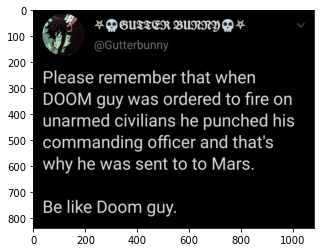

In [86]:
#testing the matplotlib method of reading an image

plt.imshow(mpimg.imread(doom_path + 'ksn72cinsy151.jpg'))

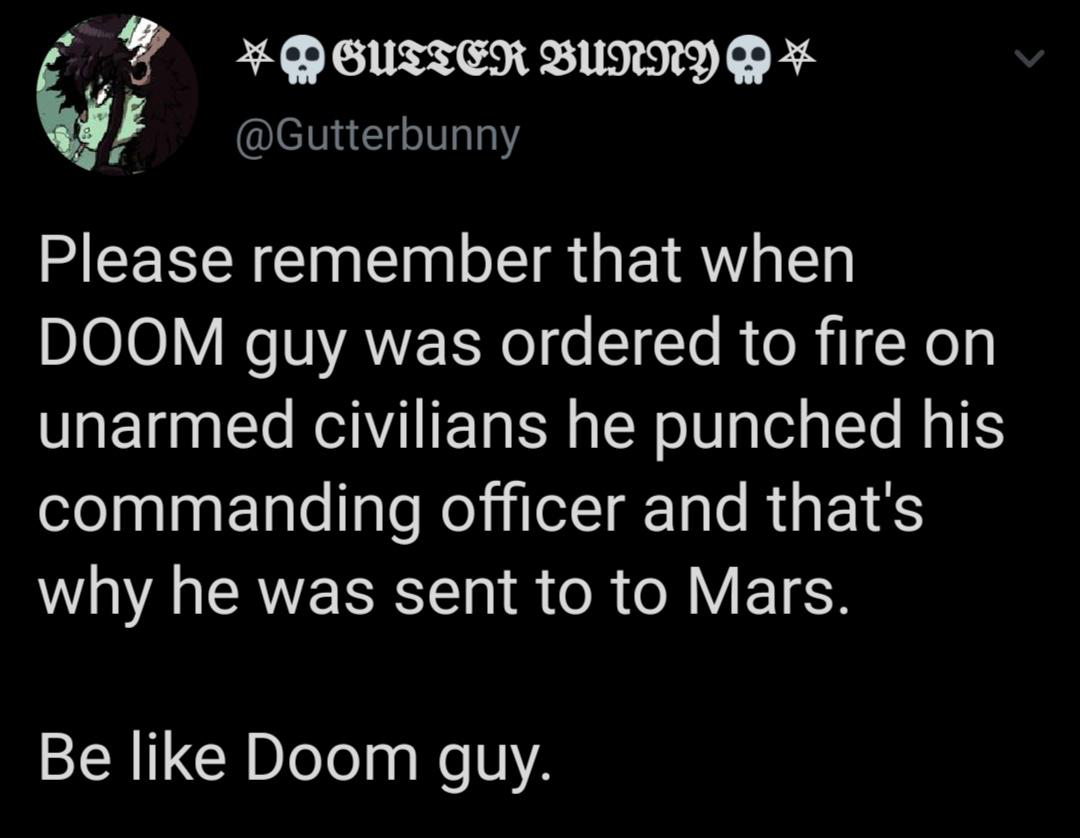

In [87]:
#testing PIL method

PIL.Image.open(doom_path + 'ksn72cinsy151.jpg')

In [149]:
#defining function which will read and show images

def image_show(filename):
    images = mpimg.imread('doom_crossing/' + filename)
    plt.figure()
    plt.imshow(images)

In [22]:
#too many images to display
#so we will display a random subset
#for exploration

In [150]:
#create random samples

doom_subset = random.sample(doom_files, 20)
animal_subset = random.sample(animal_files, 20)

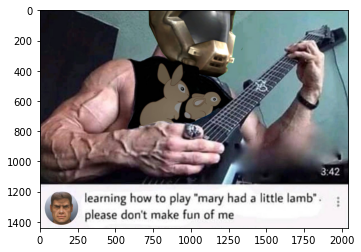

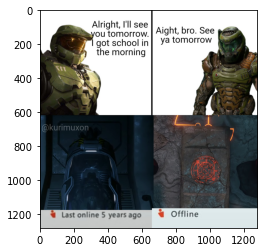

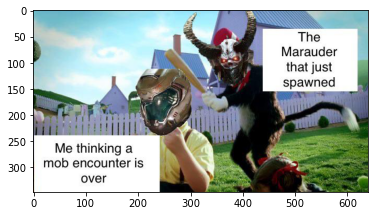

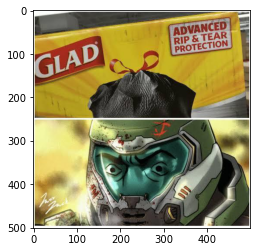

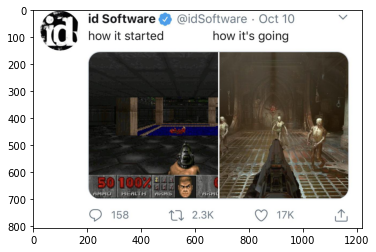

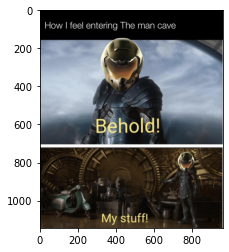

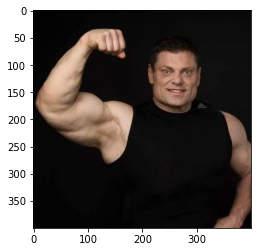

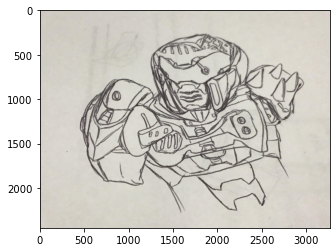

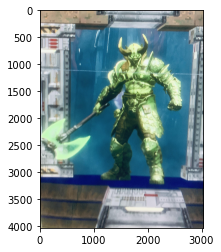

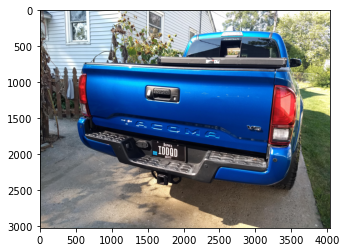

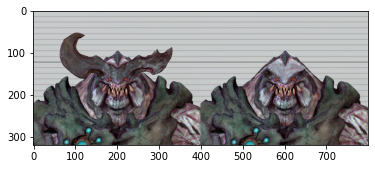

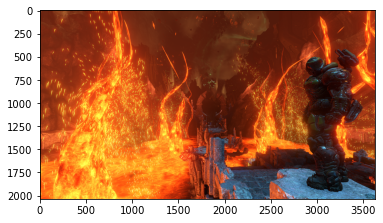

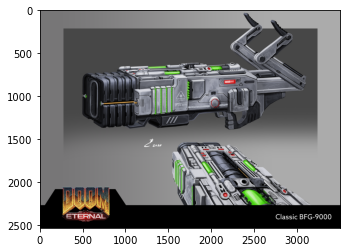

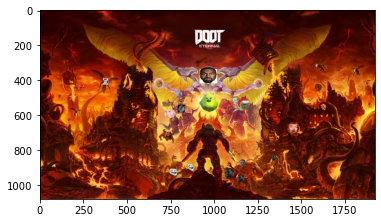

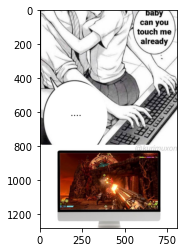

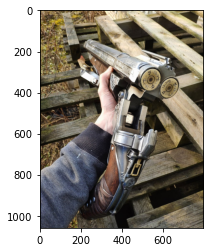

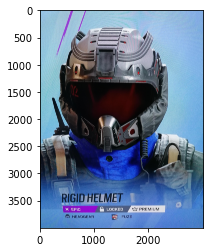

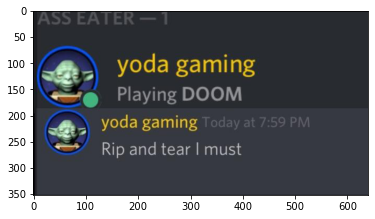

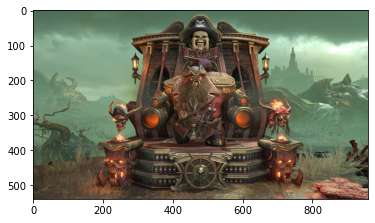

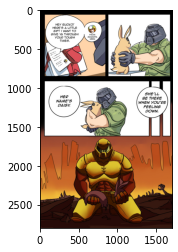

In [151]:
#display doom sample images

for i in doom_subset:
    image_show(i)

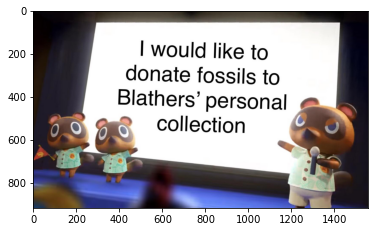

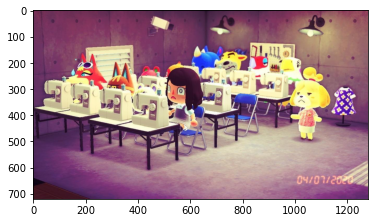

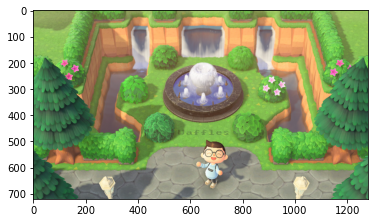

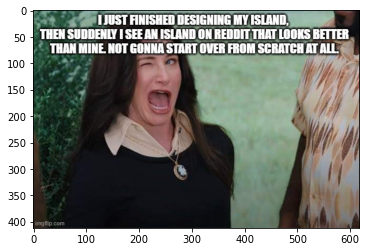

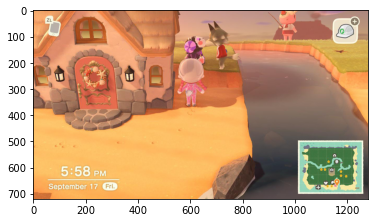

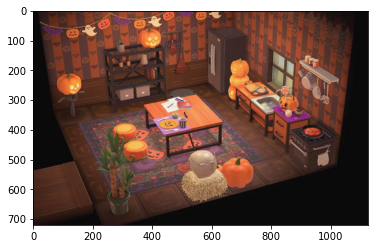

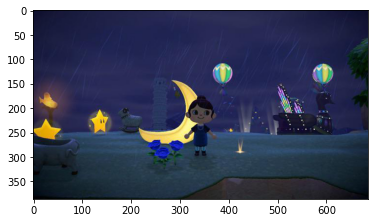

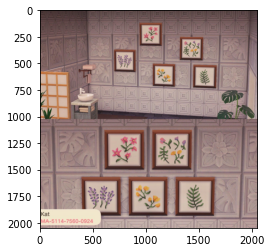

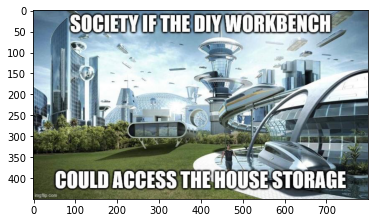

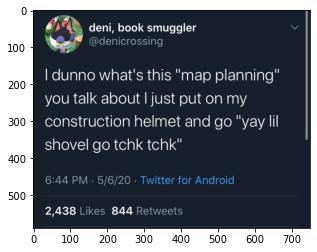

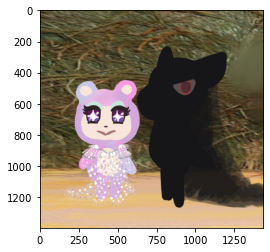

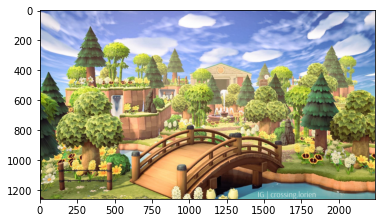

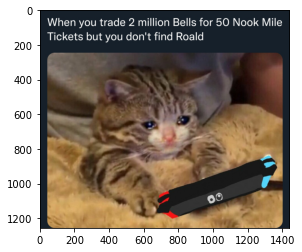

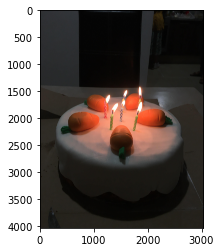

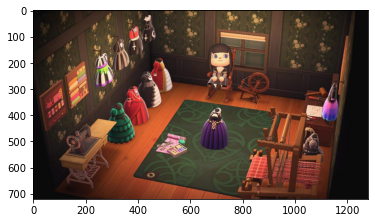

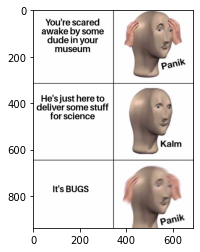

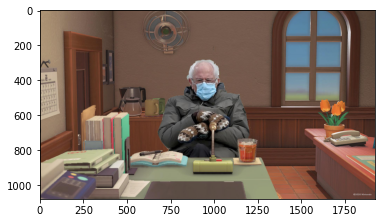

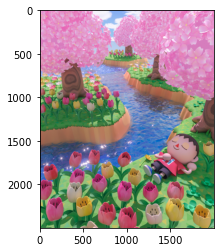

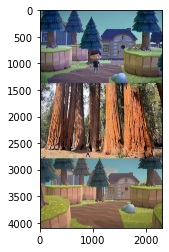

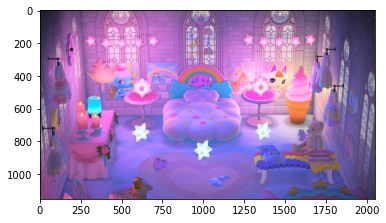

In [152]:
#display animal crossing sample images

for i in animal_subset:
    image_show(i)

In [ ]:
#some images are quite unrelated in terms of visuals
#some images only contain text
#some images contain crossover visuals/text
#doom images contains a lot more darker colours, also a lot of red

## Image Shape

In [108]:
#checking shape of first image in doom sample
#format = width, height, channel

mpimg.imread(doom_path + doom_subset[0]).shape

(2320, 3212, 3)

In [208]:
#creating empty lists to store information for each image

width = []
height = []
width_height = []

#for loop to access and store dimensions for each shape

for f in doom_crossing['filename']:
    x = PIL.Image.open('doom_crossing/' + f).size
    width.append(x[0])
    height.append(x[1])
    width_height.append(x)
    
#using PIL as it does not load image into memory
#extremely important as this allows much faster access to images

In [178]:
#found corrupt image file 'poiawx-03-fdraeaw78ln71.jpg'
#manually deleted

In [209]:
#creating new columns for width and height

doom_crossing['width'] = width
doom_crossing['height'] = height
doom_crossing['width_height'] = width_height

In [210]:
doom_crossing.head()

filename  class  width  height  width_height
0  doom/gi8nbs24u6bnam9by41.jpg      1   3456    4608  (3456, 4608)
1  doom/pa5p94lher1r33h5j71.jpg      1   4000    2574  (4000, 2574)
2  doom/pb2nn1rtxo0p387fj71.jpg      1   1280     720   (1280, 720)
3        doom/uf7dxqa622o41.jpg      1    713     721    (713, 721)
4  doom/mz091pymojq9u2djv61.png      1    845     475    (845, 475)

In [211]:
#quick analysis of widths and heights

doom_crossing['width_height'].describe()

count            4489
unique           2159
top       (1280, 720)
freq             1002
Name: width_height, dtype: object

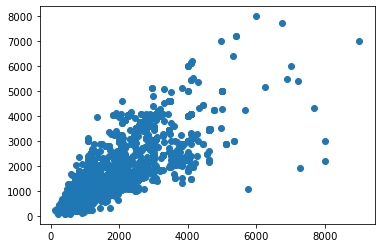

In [196]:
##scatterplot of width against height

plt.scatter(width, height)

Text(0, 0.5, 'Height')

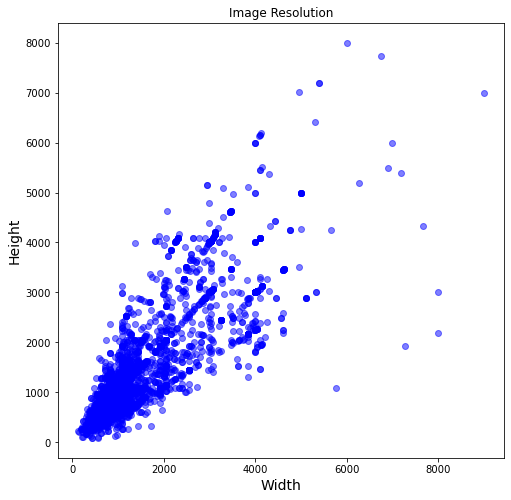

In [203]:
#better visual to see where average width and heights are concentrated

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(width, height, color='blue', alpha=0.5, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

(0.0, 4000.0, 0.0, 4000.0)

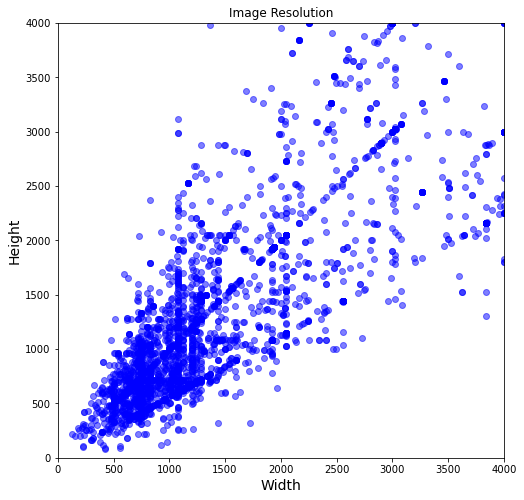

In [202]:
#zooming in by reducing axis scale

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(width, height, color='blue', alpha=0.5, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)
plt.axis([0, 4000, 0, 4000])

(0.0, 2000.0, 0.0, 2000.0)

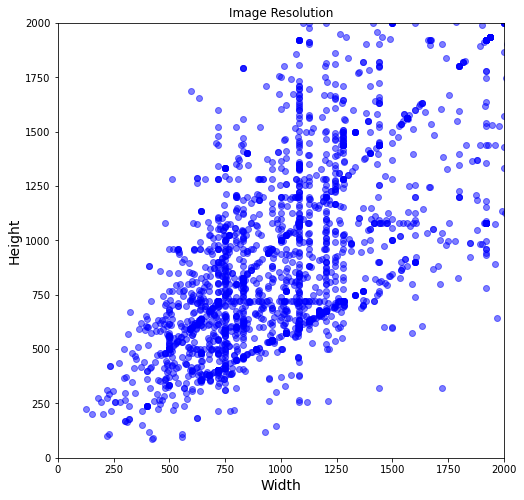

In [204]:
#zooming in further

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(width, height, color='blue', alpha=0.5, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)
plt.axis([0, 2000, 0, 2000])

# Training

In [97]:
#seperating test files by
#moving test files into new directory

for f in animal_files[:500]:
    shutil.move(animal_path + f, animal_test_path)
    
for f in doom_files[:500]:
    shutil.move(doom_path + f, doom_test_path)

In [9]:
#creating variables to be used for train/test/validation

batch_size = 32 #train/test/validation will be performed in batches of size 32
img_height = 128 #image height for resize
img_width = 128 #image width for resize
classes = ['animal_crossing', 'doom'] #class names
num_classes = 2 #number of classes

In [15]:
callbacks0 = [EarlyStopping(patience = 6), #stop training when monitored metric has stopped improving
             ReduceLROnPlateau(monitor = 'val_loss', patience = 3), #reduce learning when metric has stopped improving
             ModelCheckpoint('working/model.best1.hdf5', save_best_only=True)] #save only the best model

In [16]:
callbacks1 = [EarlyStopping(patience = 6), #stop training when monitored metric has stopped improving
             ReduceLROnPlateau(monitor = 'val_loss', patience = 3), #reduce learning when metric has stopped improving
             ModelCheckpoint('working/model.best2.hdf5', save_best_only=True)] #save only the best model

In [11]:
#create training data

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
           doom_crossing_path,
           validation_split=0.2, #80/20 split
           subset='training', #training takes 80% split
           seed=123,
           image_size=(img_height, img_width), #resize images to same height and width
           batch_size=batch_size)

Found 4489 files belonging to 2 classes.
Using 3592 files for training.


In [12]:
#create validation data

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
         doom_crossing_path,
         validation_split=0.2,
         subset='validation', #validation takes 20% split
         seed=123,
         image_size=(img_height, img_width),
         batch_size=batch_size)

Found 4489 files belonging to 2 classes.
Using 897 files for validation.


In [13]:
#create test data

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
         test_path,
         image_size=(img_height, img_width),
         batch_size=batch_size)

Found 1000 files belonging to 2 classes.


In [14]:
train_ds.class_names # read class names, oh yes baby

['animal_crossing', 'doom']

In [17]:
#creating the inital sequential model
#no dropout layers included

model = Sequential([
    
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    #normalizing the rgb values between 0-1
    #setting the format to height, width, channel
    
    layers.Conv2D(16, 3, padding='same', activation='relu'), #16 3x3 filters
    layers.MaxPooling2D(),
    
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [18]:
#compile model using 'adam' optimizer
#focus on accuracy and loss

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
#set number of epochs ('steps')
#fit the model
#set the callback which I created earlier

epochs=20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks = callbacks0
)

Epoch 1/20
113/113 [==============================] - 49s 378ms/step - loss: 0.6308 - accuracy: 0.6913 - val_loss: 0.5614 - val_accuracy: 0.7391
Epoch 2/20
113/113 [==============================] - 45s 380ms/step - loss: 0.5085 - accuracy: 0.7575 - val_loss: 0.5690 - val_accuracy: 0.7313
Epoch 3/20
113/113 [==============================] - 45s 381ms/step - loss: 0.4544 - accuracy: 0.7826 - val_loss: 0.5558 - val_accuracy: 0.7302
Epoch 4/20
113/113 [==============================] - 45s 374ms/step - loss: 0.4007 - accuracy: 0.8229 - val_loss: 0.5027 - val_accuracy: 0.7659
Epoch 5/20
113/113 [==============================] - 48s 407ms/step - loss: 0.3371 - accuracy: 0.8455 - val_loss: 0.5212 - val_accuracy: 0.7592
Epoch 6/20
113/113 [==============================] - 48s 397ms/step - loss: 0.2721 - accuracy: 0.8856 - val_loss: 0.6465 - val_accuracy: 0.7525
Epoch 7/20
113/113 [==============================] - 46s 388ms/step - loss: 0.2117 - accuracy: 0.9106 - val_loss: 0.6381 - val_ac

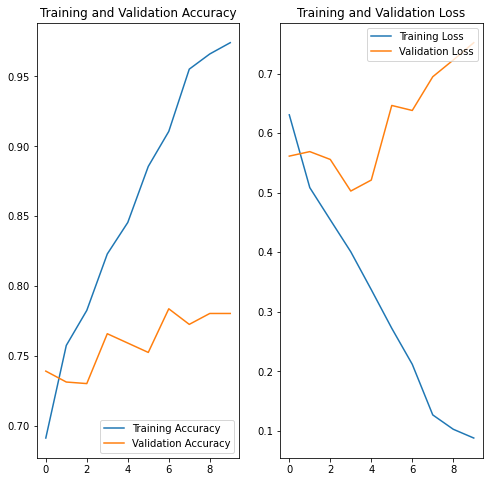

In [22]:
#callback caused the model to stop after 10 epochs
#below I will display two graphs displaying the accuracy and validation
#of both the train and validation data

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#final train accuracy , loss ----> 0.9741 , 0.0878
#final validation accuracy, loss ----> 0.7804, 0.7520
#clear overfitting
#train data performing excellently
#validation loss rapidly increasing as accuracy slowly increases

In [23]:
#augment the data
#apply some random flips, rotations and zooms
#image height and width kept same

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [24]:
#create new model
#apply augmentation
#include dropout layers to reduce overfitting

model1 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),

  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25), #reduce overfitting

  layers.Flatten(), #layers must be flattened before passing to dense; transforms from 2d to 1d

  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes) #final layer with output = num of classes
])

In [25]:
#compile using same method

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
#same nubmer of epochs
#use new callback to save seperate model

epochs = 20
history = model1.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs,
    callbacks = callbacks1
)

Epoch 1/20
113/113 [==============================] - 46s 380ms/step - loss: 0.6993 - accuracy: 0.6242 - val_loss: 0.6299 - val_accuracy: 0.6756
Epoch 2/20
113/113 [==============================] - 43s 365ms/step - loss: 0.5825 - accuracy: 0.7016 - val_loss: 0.5714 - val_accuracy: 0.7057
Epoch 3/20
113/113 [==============================] - 43s 358ms/step - loss: 0.5487 - accuracy: 0.7364 - val_loss: 0.5409 - val_accuracy: 0.7146
Epoch 4/20
113/113 [==============================] - 43s 359ms/step - loss: 0.5300 - accuracy: 0.7411 - val_loss: 0.5400 - val_accuracy: 0.7447
Epoch 5/20
113/113 [==============================] - 44s 366ms/step - loss: 0.5126 - accuracy: 0.7511 - val_loss: 0.5138 - val_accuracy: 0.7570
Epoch 6/20
113/113 [==============================] - 44s 370ms/step - loss: 0.4897 - accuracy: 0.7731 - val_loss: 0.5003 - val_accuracy: 0.7525
Epoch 7/20
113/113 [==============================] - 43s 363ms/step - loss: 0.4778 - accuracy: 0.7778 - val_loss: 0.5189 - val_ac

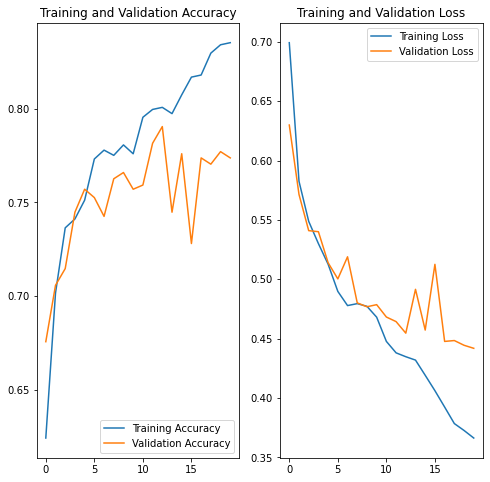

In [27]:
#used full 20 epochs
#display graphs again

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#final train accuracy , loss ----> 0.8352 , 0.3662
#final validation accuracy, loss ----> 0.7737, 0.4418
#overfitting grealy reduced
#apart from ocasional spikes, lines are similar in pattern

# Testing

In [28]:
#read test filenames

animal_test_files = ['animal_crossing/' + f for f in listdir(animal_test_path) if isfile(animal_test_path + f)]
doom_test_files = ['doom/' + f for f in listdir(doom_test_path) if isfile(doom_test_path + f)]

In [29]:
#create dataframe for test data
#create combined test dataframe

animal_test = pd.DataFrame({'filename': animal_test_files,
                           'class': 0})
doom_test = pd.DataFrame({'filename': doom_test_files,
                           'class': 1})
test_df = pd.concat([animal_test, doom_test])

In [30]:
#randomly sort the test dataframe

test_df = test_df.sample(frac=1).reset_index(drop=True)

In [31]:
test_df

filename  class
0          animal_crossing/92crm8xnhdv41.jpg      0
1               doom/flk0qtmmcsxsibppn41.png      1
2               doom/fhji28lnsgs5chv9m41.jpg      1
3                     doom/alxs1nonx5o31.jpg      1
4                     doom/032c8pe171q41.png      1
..                                       ...    ...
995                   doom/304z3hr5usu41.png      1
996  animal_crossing/g2wev6jappvd4wmbt41.jpg      0
997                   doom/cahmu5f1x2w41.jpg      1
998        animal_crossing/68u6ah79mjq41.jpg      0
999                   doom/f4ovxvk1n1j21.jpg      1

[1000 rows x 2 columns]

In [32]:
#assign both models created by the callbacks

model_best1 = load_model('working/model.best1.hdf5')
model_best2 = load_model('working/model.best2.hdf5')

In [33]:
#predicting test using model1

predictions = model_best1.predict(test_ds)
prob_doom = [x[1] for x in predictions]
prob_ac = [x[0] for x in predictions]
predictions = [np.argmax(x) for x in predictions]

In [37]:
#predicting test using model2
#overwrote the predictions as the second model was better
#bad practice

predictions = model_best2.predict(test_ds)
prob_doom = [x[1] for x in predictions]
prob_ac = [x[0] for x in predictions]
predictions = [np.argmax(x) for x in predictions]

In [50]:
#create prediction dataframe

pred_df = pd.DataFrame({"filename": test_df['filename'],
                        "class": test_df['class'],
                        "label": predictions,
                        "ac_prob": prob_ac,
                        "doom_prob": prob_doom})

In [51]:
pred_df

filename  class  label   ac_prob  \
0          animal_crossing/92crm8xnhdv41.jpg      0      1 -0.188730   
1               doom/flk0qtmmcsxsibppn41.png      1      1 -1.555127   
2               doom/fhji28lnsgs5chv9m41.jpg      1      1 -0.775554   
3                     doom/alxs1nonx5o31.jpg      1      1 -1.441576   
4                     doom/032c8pe171q41.png      1      0  1.276715   
..                                       ...    ...    ...       ...   
995                   doom/304z3hr5usu41.png      1      1 -0.170781   
996  animal_crossing/g2wev6jappvd4wmbt41.jpg      0      1 -0.195385   
997                   doom/cahmu5f1x2w41.jpg      1      0  4.423225   
998        animal_crossing/68u6ah79mjq41.jpg      0      0  3.500609   
999                   doom/f4ovxvk1n1j21.jpg      1      0  0.083707   

     doom_prob  
0    -0.038871  
1     1.052579  
2     0.861334  
3     1.446035  
4    -0.742517  
..         ...  
995  -0.039116  
996   0.027099  
997  -1.835089  
998  -1.621701  
999  -0.074893  

[1000 rows x 5 columns]

In [36]:
#accuracy of first model

accuracy_score(pred_df.iloc[:,1], pred_df.iloc[:,2]) ##model1

0.473

In [40]:
#accuracy of second model
#went back to overwrite the predictions using model2's predictions

accuracy_score(pred_df.iloc[:,1], pred_df.iloc[:,2]) ##model2

0.501

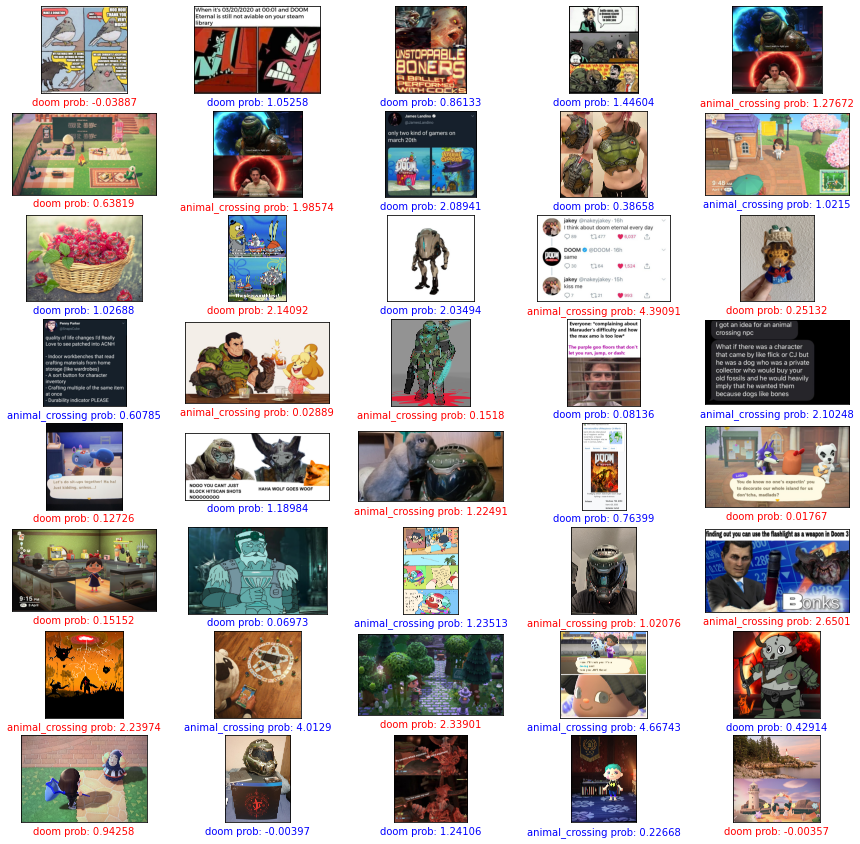

In [41]:
#display 40 predictions
#blue shows correct prediction
#red incorrect prediction

plt.figure(figsize = (15, 15))
for i in range(40):
    this_path = ('doom_crossing_test/' + pred_df.iloc[i,0])
    load_img = mpimg.imread(this_path)
    plt.subplot(8,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(load_img)
    prob = round(pred_df.iloc[i,3] if pred_df.iloc[i,2] == 0 else pred_df.iloc[i, 4], 5)
    if pred_df.iloc[i,2] == pred_df.iloc[i,1]: # correct classification
        plt.xlabel(classes[pred_df.iloc[i,2]] + " prob: " + str(prob), color = 'blue')
    else:
        plt.xlabel(classes[pred_df.iloc[i,2]] + " prob: " + str(prob), color = 'red')
plt.show()

# ResNet Attempt

In [255]:
#attempted to use the pre-trained model ResNet50V2
#did not get too far with this

keras.applications.resnet_v2.ResNet50V2()

102883328/102869336 [==============================] - 9s 0us/step


In [299]:
resnet50v2 = Sequential([
    tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3),
    pooling='avg',
    classes=(num_classes),
    classifier_activation='softmax')
])

In [300]:
resnet50v2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [301]:
epochs = 20
history = resnet50v2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20


ValueError: in user code:

    C:\Users\usayd\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\usayd\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\usayd\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\usayd\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\usayd\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\usayd\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\usayd\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:788 train_step
        loss = self.compiled_loss(
    C:\Users\usayd\AppData\Roaming\Python\Python38\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\usayd\AppData\Roaming\Python\Python38\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\usayd\AppData\Roaming\Python\Python38\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\usayd\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\usayd\AppData\Roaming\Python\Python38\site-packages\keras\losses.py:1665 categorical_crossentropy
        return backend.categorical_crossentropy(
    C:\Users\usayd\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\usayd\AppData\Roaming\Python\Python38\site-packages\keras\backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\usayd\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 2048) are incompatible


In [293]:
new_predictions = resnet50v2.predict(test_ds)
new_prob_doom = [x[1] for x in new_predictions]
new_prob_ac = [x[0] for x in new_predictions]
new_predictions = [np.argmax(x) for x in new_predictions]

In [294]:
new_pred_df = pd.DataFrame({"file": test_df['filename'],
                        "class": test_df['class'],
                        "label": new_predictions,
                        "ac_prob": new_prob_ac,
                        "doom_prob": new_prob_doom})

In [296]:
new_pred_df

file  class  label     ac_prob  \
0    animal_crossing/fxnojhq71mcpvoqqr41.png      0   1639   70.144180   
1               doom/fuwp938w85afmqwtq41.jpg      1   1639   89.919144   
2                     doom/1oo31jmwtga31.png      1   1639   14.368465   
3    animal_crossing/fzxafkb1298fvz8es41.png      0   1639    6.913299   
4          animal_crossing/74p1pze5l4051.jpg      0   1329   40.704994   
..                                       ...    ...    ...         ...   
995                   doom/a56ql61z32g41.jpg      1   1639   20.424881   
996             doom/fwe2rtv688k3qkqbr41.jpg      1   1639   92.303223   
997                   doom/6qwnlgi3osh31.jpg      1   1639   31.869919   
998                   doom/94wdrbbld4u41.png      1   1639  111.940544   
999        animal_crossing/87bweooc8mp41.png      0   1639   53.442257   

     doom_prob  
0    26.382780  
1    34.740967  
2    35.132259  
3    40.805428  
4    71.270432  
..         ...  
995  30.595474  
996  33.022526  
997  15.129913  
998  34.736675  
999   9.363705  

[1000 rows x 5 columns]

In [295]:
accuracy_score(new_pred_df.iloc[:,1], new_pred_df.iloc[:,2])

0.0

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    ##normalizing the rgb values between 0-1
    ##setting the format to height, width, channel
  layers.Conv2D(16, 3, padding='same', activation='relu'), ##16 3x3 filters
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# Tesseract / NLP

## Import

In [42]:
import pytesseract
import nltk
import re
import string

from collections import Counter

from wordcloud import WordCloud

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usayd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usayd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\usayd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [43]:
pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'

## Test

In [ ]:
#the beginning of the beautiful OCR tool; tesseract

In [376]:
#open doom image which has text

w = PIL.Image.open(doom_path + 'fxamc5hp5dq41.png')

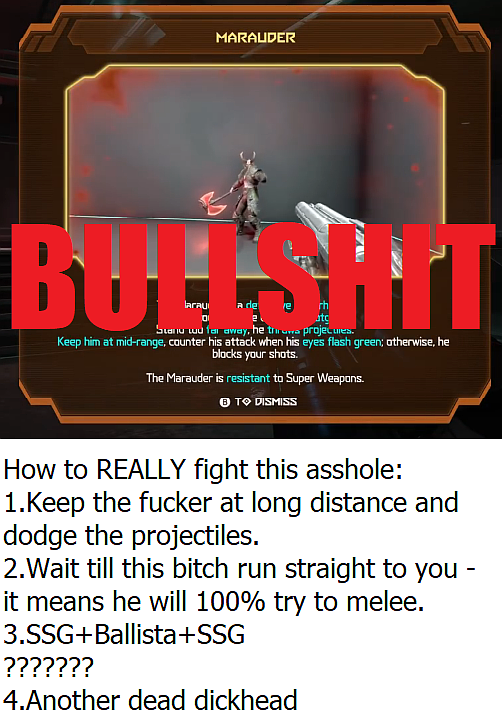

In [369]:
#sharpen image by factor 2

PIL.ImageEnhance.Sharpness(w).enhance(2)

In [382]:
#'text' is reading the image without sharpening
#'enhanced_text' is reading the image with sharpening

text = pytesseract.image_to_string(doom_path + 'fxamc5hp5dq41.png')
enhanced_text = pytesseract.image_to_string(PIL.ImageEnhance.Sharpness(w).enhance(2))

In [374]:
type(text) #just a long string

str

In [383]:
#untouched image text

print(text)

  

Keep him at mid-range,
Dios your sats

The Marauder is resistant te Super Weapans.

© To Dismiss

How to REALLY fight this asshole:
1.Keep the fucker at long distance and
dodge the projectiles.

2.Wait till this bitch run straight to you -

it means he will 100% try to melee.
3.SSG+ Ballista+SSG
222722?

4.Another dead dickhead

 



In [384]:
#sharpened image text, as shown below
#blurring/sharpening both help greatly when reading text from image

print(enhanced_text)

MARAUDER

 

a
Keep him at mid-range, counter, otic whenfis eyes ash green: otherwise. be
ss your shats.

‘The Marauder is resistant to Super Weapons.

© To DMs

How to REALLY fight this asshole:
1.Keep the fucker at long distance and
dodge the projectiles.

2.Wait till this bitch run straight to you -

it means he will 100% try to melee.
3.SSG+ Ballista+SSG

 

4.Another dead dickhead



## Let's-a-go

### Read All Images

In [44]:
#beautiful module used for timing processes
#very useful to see if a process if hanging
#and to see the speed of a process

from tqdm import tqdm

In [554]:
image_text = [] #create empty list to hold all the strings that will be read
for f in tqdm(doombag['filename']):
    x = PIL.Image.open(doom_crossing_path + f) #open
    x = PIL.ImageEnhance.Sharpness(x).enhance(2) #sharpen
    image_text.append(pytesseract.image_to_string(x)) #read and append to list
    
#holy smokes this is long

  6%|████▎                                                                          | 109/1980 [03:19<57:08,  1.83s/it]


KeyboardInterrupt: 

In [475]:
#store text in new column

doom_crossing['image_text'] = image_text

In [555]:
#create copy of dataframe

fullbag = doom_crossing.copy()

### Regex/Lemontize

In [45]:
#time to start the lemmatizing
#set up lemmatizer
#get stop words
#add punctuation to stop words

lemmatizer = WordNetLemmatizer()
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(string.punctuation)

In [46]:
#clean text using regex

def regex_clean(txt, regex):
    return " ".join(re.sub(regex, " ", txt).split())

In [47]:
#use regex_clean to clean text
#tokenize text
#remove tokens which are stop words
#lemmatize tokens

def prep_data(text):
    
    text = text.lower()
    text = regex_clean(text, r'\s\d+\s')

    text = word_tokenize(text)

    text = [word for word in text if word not in stpwrd]    
    text = [lemmatizer.lemmatize(word) for word in text]
    
    return text

In [430]:
print(enhanced_text)

MARAUDER

 

a
Keep him at mid-range, counter, otic whenfis eyes ash green: otherwise. be
ss your shats.

‘The Marauder is resistant to Super Weapons.

© To DMs

How to REALLY fight this asshole:
1.Keep the fucker at long distance and
dodge the projectiles.

2.Wait till this bitch run straight to you -

it means he will 100% try to melee.
3.SSG+ Ballista+SSG

 

4.Another dead dickhead



In [457]:
#testing the function on previously extracted text
#far from perfect

prep_data(enhanced_text)

['marauder',
 'keep',
 'mid-range',
 'counter',
 'otic',
 'whenfis',
 'eye',
 'ash',
 'green',
 'otherwise',
 's',
 'shats',
 '‘',
 'marauder',
 'resistant',
 'super',
 'weapon',
 '©',
 'dm',
 'really',
 'fight',
 'asshole',
 '1.keep',
 'fucker',
 'long',
 'distance',
 'dodge',
 'projectile',
 '2.wait',
 'till',
 'bitch',
 'run',
 'straight',
 'mean',
 '100',
 'try',
 'melee',
 '3.ssg+',
 'ballista+ssg',
 '4.another',
 'dead',
 'dickhead']

### Bag of Words Attempt

In [556]:
#cleaning and tokenizing all extracted texts
#storing in new tokens columns

fullbag['tokens'] = fullbag['image_text'].apply(prep_data)

In [558]:
#over half the data has no (readable) text

fullbag[fullbag['tokens'].str.len() == 0]

filename  class  width  height  \
1                    doom/pa5p94lher1r33h5j71.jpg      1   4000    2574   
2                    doom/pb2nn1rtxo0p387fj71.jpg      1   1280     720   
4                    doom/mz091pymojq9u2djv61.png      1    845     475   
5         animal_crossing/hjh5kg9g4vh7kcra851.jpg      0   2896    2896   
7                    doom/mpr6w48027mqnd5us61.jpg      1   1146    1516   
...                                           ...    ...    ...     ...   
4478      animal_crossing/prqiu2l5jqd9jjbmo71.jpg      0    828     605   
4479  animal_crossing/ppo69x-04-vppci6bq4yn71.jpg      0   1280     720   
4486                 doom/lf3kcdrslunzxfh6g61.jpg      1   1200     855   
4487  animal_crossing/pr075c-12-npp16690ndo71.jpg      0   1280     720   
4488            animal_crossing/jlkpo9ZGzVNpd.jpg      0   2000    2000   

      width_height           image_text tokens  
1     (4000, 2574)                  \n
     []  
2      (1280, 720)                  \n
     []  
4       (845, 475)                  \n
     []  
5     (2896, 2896)   \n\n \n\n \n\n \n
     []  
7     (1146, 1516)                  \n
     []  
...            ...                  ...    ...  
4478    (828, 605)                  \n
     []  
4479   (1280, 720)                  \n
     []  
4486   (1200, 855)                  \n
     []  
4487   (1280, 720)                  \n
     []  
4488  (2000, 2000)                  \n
     []  

[2509 rows x 7 columns]

In [559]:
#drop these rows

fullbag = fullbag[fullbag['tokens'].str.len() != 0]

In [560]:
fullbag

filename  class  width  height  \
0                    doom/gi8nbs24u6bnam9by41.jpg      1   3456    4608   
3                          doom/uf7dxqa622o41.jpg      1    713     721   
6                    doom/pk6lpq03mbyc84s8m71.jpg      1   3264    2448   
9                    doom/igect5u0nm14ln26j51.jpg      1   4032    3024   
10                   doom/pg3x0jg68hzzw3qyk71.jpg      1    981     488   
...                                           ...    ...    ...     ...   
4481                 doom/n9lg4vcy8m44bz7ey61.png      1    594     500   
4482            animal_crossing/rbh7oe3eki151.jpg      0   1334     750   
4483      animal_crossing/pry2657b3hllrmnoo71.jpg      0    500     851   
4484  animal_crossing/prvavw-06-od3w15vxxno71.jpg      0   1170    2532   
4485  animal_crossing/pqwqhe-03-79ny4k3chco71.jpg      0   1280     720   

      width_height                                         image_text  \
0     (3456, 4608)  COLLECTECSeS\n\nARTICULATED | WITH SOUND >\n\n...   
3       (713, 721)  Me seeing demons fighting\neach other before |...   
6     (3264, 2448)   Ly ¢\naf} vif,\n\n‘ ,\n<j\n\nut\n\n‘\\n\\n\n \n
   
9     (4032, 3024)   \n\n| ities. wiaumiusae e\na ~~ i? SL os\n\nB...   
10      (981, 488)                      aes ine HW ORANG CENA\n\n \n
   
...            ...                                                ...   
4481    (594, 500)  We have to admit, the classic Doom plasma\ngun...   
4482   (1334, 750)  >.\n\n \n\ney\n\nPreh\n\n@\nOOH\n\n \n\n \n\ne...   
4483    (500, 851)    \n \n\nIf you’re saying | play favorites, yo...   
4484  (1170, 2532)                  =\n=\n00\n©\n=\nN\no>)\n=\n\n \n
   
4485   (1280, 720)  Custom Designs Portal\n\neB 6Q EQ\n\nSearch by...   

                                                 tokens  
0     [collectecses, articulated, sound, ii, snes, —...  
3     [seeing, demon, fighting, even, get, area, da,...  
6                         [ly, ¢, af, vif, ‘, j, ut, ‘]  
9     [ities, wiaumiusae, e, ~~, sl, o, bp, ime, bw,...  
10                          [aes, ine, hw, orang, cena]  
...                                                 ...  
4481  [admit, classic, doom, plasma, gun, overpowere...  
4482                                [ey, preh, ooh, e®]  
4483  [’, saying, play, favorite, 're, wi, hat, dal,...  
4484                                             [©, n]  
4485  [custom, design, portal, eb, 6q, eq, search, c...  

[1980 rows x 7 columns]

In [561]:
fullbag[fullbag['class'] == 1] ##almost 50/50 split, sweet

filename  class  width  height  width_height  \
0     doom/gi8nbs24u6bnam9by41.jpg      1   3456    4608  (3456, 4608)   
3           doom/uf7dxqa622o41.jpg      1    713     721    (713, 721)   
6     doom/pk6lpq03mbyc84s8m71.jpg      1   3264    2448  (3264, 2448)   
9     doom/igect5u0nm14ln26j51.jpg      1   4032    3024  (4032, 3024)   
10    doom/pg3x0jg68hzzw3qyk71.jpg      1    981     488    (981, 488)   
...                            ...    ...    ...     ...           ...   
4470  doom/pa74uznbxb56t4u5j71.png      1    504     556    (504, 556)   
4471        doom/m4xfwt0hfao41.jpg      1    684     681    (684, 681)   
4473  doom/ofj9z8lbswsexfps971.png      1    640     640    (640, 640)   
4480  doom/pex1pvjkt6trwtvlk71.jpg      1   4608    3456  (4608, 3456)   
4481  doom/n9lg4vcy8m44bz7ey61.png      1    594     500    (594, 500)   

                                             image_text  \
0     COLLECTECSeS\n\nARTICULATED | WITH SOUND >\n\n...   
3     Me seeing demons fighting\neach other before |...   
6      Ly ¢\naf} vif,\n\n‘ ,\n<j\n\nut\n\n‘\\n\\n\n \n
   
9      \n\n| ities. wiaumiusae e\na ~~ i? SL os\n\nB...   
10                        aes ine HW ORANG CENA\n\n \n
   
...                                                 ...   
4470    \n \n \n       \n    \n  \n  \n \n \n \n  \n...   
4471               lalchainsa\nlooking'for\nWie\n\n \n
   
4473  1Am Jesus Christ Comment Hab\n\nJesus CHRIST\n...   
4480   \n\nif yes tA fri\n\n-\n\n1a\n\n \n\nHM el\n|...   
4481  We have to admit, the classic Doom plasma\ngun...   

                                                 tokens  
0     [collectecses, articulated, sound, ii, snes, —...  
3     [seeing, demon, fighting, even, get, area, da,...  
6                         [ly, ¢, af, vif, ‘, j, ut, ‘]  
9     [ities, wiaumiusae, e, ~~, sl, o, bp, ime, bw,...  
10                          [aes, ine, hw, orang, cena]  
...                                                 ...  
4470  [jp, game, n, lg, doom, ii, hell, ‘, on€earth,...  
4471                     [lalchainsa, looking'for, wie]  
4473  [1am, jesus, christ, comment, hab, jesus, chri...  
4480  [yes, ta, fri, 1a, hm, el, |=, al, oe, —, 18, ...  
4481  [admit, classic, doom, plasma, gun, overpowere...  

[1097 rows x 7 columns]

In [562]:
#seperate into animal crossing images
#and doom images

animalbag = fullbag[fullbag['class'] == 0]
doombag = fullbag[fullbag['class'] == 1]

In [ ]:
#removing stop words

animalbag['tokens'] = animalbag['tokens'].apply(lambda x:[words for words in x if words not in stpwrd])
doombag['tokens'] = doombag['token'].apply(lambda x:[words for words in x if words not in stpwrd])

In [576]:
#creating counter for animal crossing
#looking at the count of each token in animal crossing

animal_counts = Counter()
animal_tokens = animalbag['tokens'].apply(animal_counts.update)
print(animal_counts)

Counter({'‘': 116, 'like': 92, 'ae': 88, "'s": 87, '“': 86, 'island': 86, 'e': 85, '’': 76, '...': 74, 'animal': 74, 'crossing': 73, '—': 71, 'ee': 70, "n't": 62, 'oe': 51, 'villager': 51, 'twitter': 46, '©': 43, '``': 42, 'pm': 36, 'time': 35, 'f': 35, 'j': 35, "''": 35, 'se': 34, 'new': 34, 'nook': 34, '”': 32, 'want': 30, "'m": 30, '--': 30, 'go': 28, '»': 27, 'eee': 27, 'ie': 27, "'ve": 27, 'one': 26, 'b': 26, "'re": 26, 'look': 26, 'know': 25, 'would': 25, 'design': 25, 'ca': 24, 'game': 24, 'see': 23, 'iphone': 23, 'retweets': 23, 'u': 23, 'got': 23, 'please': 23, 's': 23, 'ay': 22, 'v': 22, 'x': 22, 'get': 21, 'oh': 20, 'r': 20, 'aa': 20, 'te': 19, '2': 19, 'al': 19, 'back': 19, 'ey': 19, 'thing': 18, 'hi': 18, 'w': 18, 'first': 18, 'think': 18, 'l': 17, 'september': 17, "'ll": 17, 'g': 17, 'tom': 17, 'ea': 17, 'blather': 17, 'ge': 17, 'custom': 17, '1': 17, 'flower': 17, 'made': 16, 'q': 16, 'love': 16, 'even': 16, 'make': 16, 'isabelle': 16, '«': 16, 'every': 15, 'day': 15, 'r

In [573]:
#creating counter for doom
#looking at the count of each token in doom

doom_counts = Counter()
doom_tokens = doombag['tokens'].apply(doom_counts.update)
print(doom_counts)

Counter({'doom': 335, '‘': 252, '“': 184, 'ee': 165, 'e': 146, '—': 135, '’': 132, 'eternal': 125, '``': 122, "''": 117, 'ae': 111, 'slayer': 106, 'game': 106, '©': 103, 'year': 95, "'s": 88, 'f': 86, '”': 81, 'demon': 79, '...': 77, 'j': 69, 'v': 67, 'eee': 67, 's': 66, 'oe': 65, 'like': 61, '»': 58, 'one': 57, 'x': 51, 'way': 50, 'se': 47, 'time': 47, 'guy': 47, '4': 45, 'r': 44, "n't": 44, 'ie': 43, '¥': 43, 'see': 43, '1': 42, '«': 42, 'made': 41, 'doomguy': 41, 'n': 39, 'get': 39, 'kill': 39, 'oo': 38, 'te': 38, 'ey': 38, 'ago': 37, 'b': 37, 'ay': 37, 'imp': 36, 'hell': 36, '2': 35, 'p': 35, 'q': 33, 'aa': 33, 'id': 32, 'marauder': 32, 'al': 31, '0': 31, '\\\\': 31, 'l': 30, 'na': 29, 'w': 29, 'il': 29, 'fe': 29, 'u': 29, 'level': 28, 'om': 28, 'c': 28, 'ce': 28, 'completed': 28, 'ancient': 28, 'first': 28, '~~': 27, 'super': 27, 'ea': 26, 'go': 26, 'ta': 26, 'reply': 25, 'ne': 25, 'h': 25, 'g': 25, '7': 25, 'back': 25, 'fps': 25, 'ca': 25, 'ii': 24, 'le': 24, 'sin': 24, 'tt': 24,

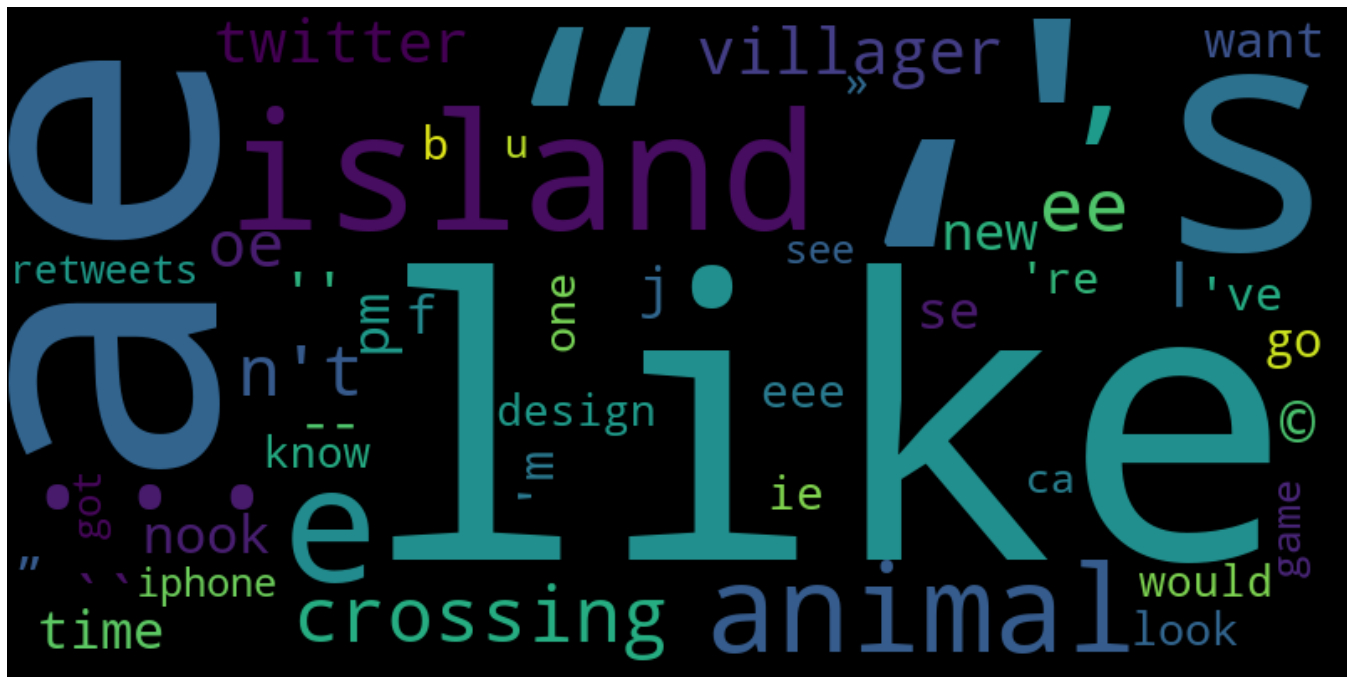

In [578]:
#visualising the animal crossing counter as a wordcloud

ac = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(animal_counts)
plt.figure(figsize=(24,20))
plt.imshow(ac, interpolation="bilinear")
plt.axis("off")
plt.show()

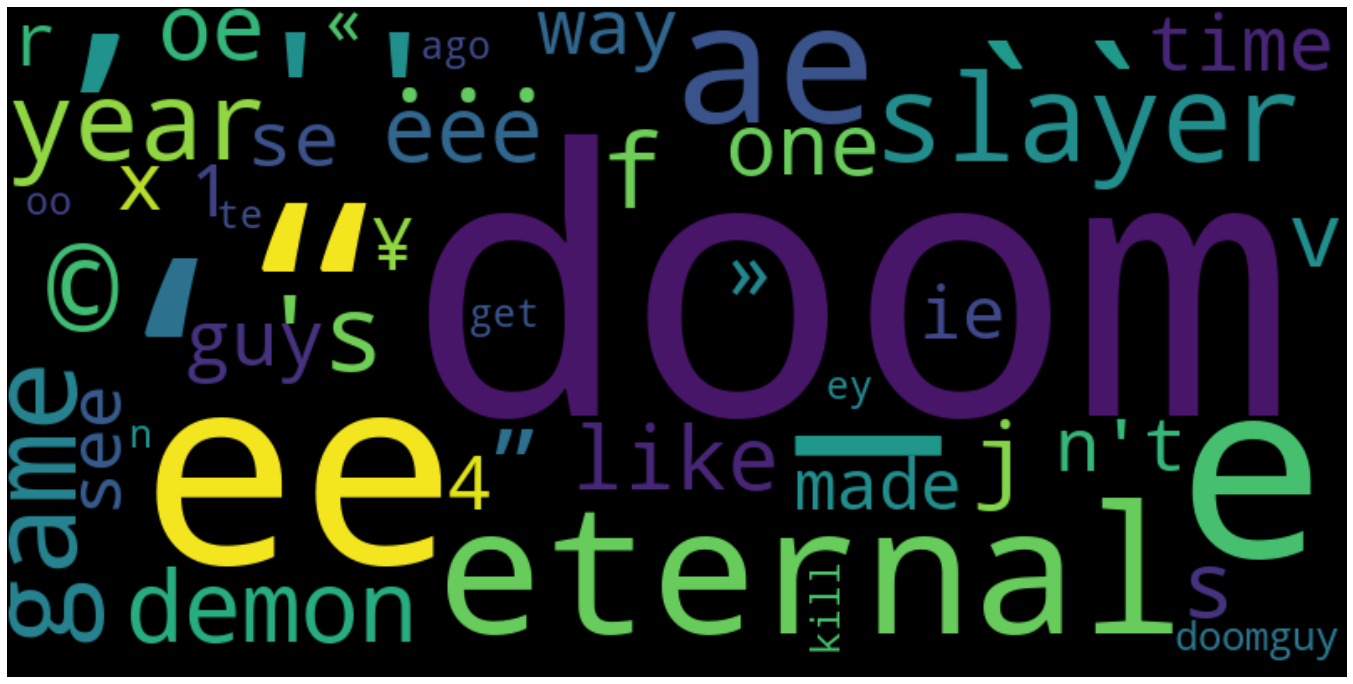

In [579]:
#visualising the doom counter as a wordcloud

dc = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(doom_counts)
plt.figure(figsize=(24,20))
plt.imshow(dc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#a lot of mess here
#bad characters
#split text
#a lot of manual work to identify keywords

## Scoring

In [606]:
fullbag

filename  class  width  height  \
0                    doom/gi8nbs24u6bnam9by41.jpg      1   3456    4608   
3                          doom/uf7dxqa622o41.jpg      1    713     721   
6                    doom/pk6lpq03mbyc84s8m71.jpg      1   3264    2448   
9                    doom/igect5u0nm14ln26j51.jpg      1   4032    3024   
10                   doom/pg3x0jg68hzzw3qyk71.jpg      1    981     488   
...                                           ...    ...    ...     ...   
4481                 doom/n9lg4vcy8m44bz7ey61.png      1    594     500   
4482            animal_crossing/rbh7oe3eki151.jpg      0   1334     750   
4483      animal_crossing/pry2657b3hllrmnoo71.jpg      0    500     851   
4484  animal_crossing/prvavw-06-od3w15vxxno71.jpg      0   1170    2532   
4485  animal_crossing/pqwqhe-03-79ny4k3chco71.jpg      0   1280     720   

      width_height                                         image_text  \
0     (3456, 4608)  COLLECTECSeS\n\nARTICULATED | WITH SOUND >\n\n...   
3       (713, 721)  Me seeing demons fighting\neach other before |...   
6     (3264, 2448)   Ly ¢\naf} vif,\n\n‘ ,\n<j\n\nut\n\n‘\\n\\n\n \n
   
9     (4032, 3024)   \n\n| ities. wiaumiusae e\na ~~ i? SL os\n\nB...   
10      (981, 488)                      aes ine HW ORANG CENA\n\n \n
   
...            ...                                                ...   
4481    (594, 500)  We have to admit, the classic Doom plasma\ngun...   
4482   (1334, 750)  >.\n\n \n\ney\n\nPreh\n\n@\nOOH\n\n \n\n \n\ne...   
4483    (500, 851)    \n \n\nIf you’re saying | play favorites, yo...   
4484  (1170, 2532)                  =\n=\n00\n©\n=\nN\no>)\n=\n\n \n
   
4485   (1280, 720)  Custom Designs Portal\n\neB 6Q EQ\n\nSearch by...   

                                                 tokens  
0     [collectecses, articulated, sound, ii, snes, —...  
3     [seeing, demon, fighting, even, get, area, da,...  
6                         [ly, ¢, af, vif, ‘, j, ut, ‘]  
9     [ities, wiaumiusae, e, ~~, sl, o, bp, ime, bw,...  
10                          [aes, ine, hw, orang, cena]  
...                                                 ...  
4481  [admit, classic, doom, plasma, gun, overpowere...  
4482                                [ey, preh, ooh, e®]  
4483  [’, saying, play, favorite, 're, wi, hat, dal,...  
4484                                             [©, n]  
4485  [custom, design, portal, eb, 6q, eq, search, c...  

[1980 rows x 7 columns]

In [696]:
#labeling the tokens to identify
#which are doom, which are animal crossing
#and which have no text

labels = []

for tokens in fullbag['tokens']:
    if any(i in tokens for i in doom_words) == True:
        labels.append(1)
    elif any(i in tokens for i in animal_words) == True:
        labels.append(0)
    else:
        labels.append(2)

In [697]:
labels

[2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 1,
 0,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 0,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 0,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 1,
 0,
 1,


In [699]:
#assign labels to new 'labels' column

fullbag['labels'] = labels

<ipython-input-699-2f9d6ef2ad4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fullbag['labels'] = labels


In [706]:
fullbag

filename  class  width  height  \
0                    doom/gi8nbs24u6bnam9by41.jpg      1   3456    4608   
3                          doom/uf7dxqa622o41.jpg      1    713     721   
6                    doom/pk6lpq03mbyc84s8m71.jpg      1   3264    2448   
9                    doom/igect5u0nm14ln26j51.jpg      1   4032    3024   
10                   doom/pg3x0jg68hzzw3qyk71.jpg      1    981     488   
...                                           ...    ...    ...     ...   
4481                 doom/n9lg4vcy8m44bz7ey61.png      1    594     500   
4482            animal_crossing/rbh7oe3eki151.jpg      0   1334     750   
4483      animal_crossing/pry2657b3hllrmnoo71.jpg      0    500     851   
4484  animal_crossing/prvavw-06-od3w15vxxno71.jpg      0   1170    2532   
4485  animal_crossing/pqwqhe-03-79ny4k3chco71.jpg      0   1280     720   

      width_height                                         image_text  \
0     (3456, 4608)  COLLECTECSeS\n\nARTICULATED | WITH SOUND >\n\n...   
3       (713, 721)  Me seeing demons fighting\neach other before |...   
6     (3264, 2448)   Ly ¢\naf} vif,\n\n‘ ,\n<j\n\nut\n\n‘\\n\\n\n \n
   
9     (4032, 3024)   \n\n| ities. wiaumiusae e\na ~~ i? SL os\n\nB...   
10      (981, 488)                      aes ine HW ORANG CENA\n\n \n
   
...            ...                                                ...   
4481    (594, 500)  We have to admit, the classic Doom plasma\ngun...   
4482   (1334, 750)  >.\n\n \n\ney\n\nPreh\n\n@\nOOH\n\n \n\n \n\ne...   
4483    (500, 851)    \n \n\nIf you’re saying | play favorites, yo...   
4484  (1170, 2532)                  =\n=\n00\n©\n=\nN\no>)\n=\n\n \n
   
4485   (1280, 720)  Custom Designs Portal\n\neB 6Q EQ\n\nSearch by...   

                                                 tokens  labels  
0     [collectecses, articulated, sound, ii, snes, —...       2  
3     [seeing, demon, fighting, even, get, area, da,...       1  
6                         [ly, ¢, af, vif, ‘, j, ut, ‘]       2  
9     [ities, wiaumiusae, e, ~~, sl, o, bp, ime, bw,...       1  
10                          [aes, ine, hw, orang, cena]       2  
...                                                 ...     ...  
4481  [admit, classic, doom, plasma, gun, overpowere...       1  
4482                                [ey, preh, ooh, e®]       2  
4483  [’, saying, play, favorite, 're, wi, hat, dal,...       2  
4484                                             [©, n]       2  
4485  [custom, design, portal, eb, 6q, eq, search, c...       2  

[1980 rows x 8 columns]

In [712]:
#check accuracy of purely OCR work
#should have dropped non-text images to
#see a more accurate result

accuracy_score(fullbag.iloc[:,1], fullbag.iloc[:,7])

0.35

# The Finalé

## OCR on Test (First Read 'Investigate' & 'Bad Image')

In [179]:
test_df.iloc[100:200]

filename  class
100             doom/96d2rfs8mh431.jpg      1
101             doom/aq0xqqjujnr31.jpg      1
102             doom/8zvfzi0w2og31.jpg      1
103  animal_crossing/emffoowlk3251.jpg      0
104             doom/buwnc37azvo41.jpg      1
..                                 ...    ...
195       doom/dy0pcc1vg7jk65tez31.jpg      1
196  animal_crossing/0czcmw8rmsz41.jpg      0
197  animal_crossing/93nvxauhqx051.jpg      0
198             doom/4ttnvnb0iq051.jpg      1
199  animal_crossing/23gxv6wtxzu41.jpg      0

[100 rows x 2 columns]

In [185]:
#creating a list of filenames from prediction dataframe

pred_files = list(pred_df['filename'])

In [177]:
#seperating the files into chunks

chunks = [pred_files[x:x+100] for x in range(0, len(pred_files), 100)]

In [184]:
#creating batches

batch0, batch1, batch2, batch3, batch4, batch5, batch6, batch7, batch8, batch9 = zip(*chunks)

ValueError: too many values to unpack (expected 10)

In [167]:
#create 10 batches of 100 images for text extraction

pred_files = list(pred_df['filename'])

n=100

batched=[pred_files[i:i + n] for i in range(0, len(pred_files), n)]
batch0, batch1, batch2, batch3, batch4, batch5, batch6, batch7, batch8, batch9 = map(list, zip(*batched))

ValueError: too many values to unpack (expected 10)

In [168]:
batched

[['animal_crossing/92crm8xnhdv41.jpg',
  'doom/flk0qtmmcsxsibppn41.png',
  'doom/fhji28lnsgs5chv9m41.jpg',
  'doom/alxs1nonx5o31.jpg',
  'doom/032c8pe171q41.png',
  'animal_crossing/2v9ke0u7u3251.jpg',
  'doom/fsfixn032c8pe171q41.png',
  'doom/6ife5p6ecxd41.jpg',
  'doom/0p43pkc3jpn41.jpg',
  'animal_crossing/fuv26r176wf6duetq41.jpg',
  'doom/93oamcvfewu31.png',
  'animal_crossing/ac7l2g40fi051.jpg',
  'doom/fvi2obvdihreplg1r41.jpg',
  'doom/cazrmunumuacocm9931.jpg',
  'animal_crossing/1vy8abm.jpg',
  'animal_crossing/frnwqdt1u2dgqe8sp41.jpg',
  'doom/2chcpwqx8ho41.jpg',
  'doom/3qix8hhweme41.png',
  'doom/fo4vqczw1udqi5pjo41.png',
  'animal_crossing/2ehmq0fjpj051.jpg',
  'animal_crossing/8m741cmscov41.jpg',
  'doom/fmp8b9hq9mgf9cz3o41.png',
  'doom/fn28zwXOZzVI8h.jpg',
  'doom/733kr2ixqd541.jpg',
  'animal_crossing/crtltmrgkox41.jpg',
  'animal_crossing/fxrj3nkenwfylpcsr41.png',
  'doom/bn6q5o00nuq41.png',
  'animal_crossing/fyjww0rhrzucd6w0s41.png',
  'doom/fly6xr7810sp2lwun41.jpg',


In [127]:
batches = batch0, batch1, batch2, batch3, batch4, batch5, batch6, batch7, batch8, batch9

In [128]:
len(batch0)

100

In [129]:
len(batch9)

100

In [204]:
test_text = []

In [205]:
#function to read text from all files in one go

def right_now(files):
    for f in tqdm(files):
        x = PIL.Image.open(test_path + f)
        x = PIL.ImageEnhance.Sharpness(x).enhance(2)
        test_text.append(pytesseract.image_to_string(x))

In [131]:
#function to read text from files in batches

def text_extraction(batches):
    for batch in batches:
        for f in tqdm(batch):
                x = PIL.Image.open(test_path + f)
                x = PIL.ImageEnhance.Sharpness(x).enhance(2)
                test_text.append(pytesseract.image_to_string(x))

In [132]:
batch5[34]
#this is the image causing issues

'animal_crossing/g0l5162ppet41.jpg'

In [188]:
#remove it from prediction

del pred_files[345]

In [133]:
#remove from batch

del batch5[34]

In [206]:
#run all in one text extraction

right_now(pred_files)

100%|████████████████████████████████████████████████████████████████████████████████| 999/999 [24:04<00:00,  1.45s/it]


In [134]:
#run batch text extraction function

text_extraction(batches)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:27<00:00,  1.48s/it]


In [ ]:
#overall, both take approximately the same time
#batches ---> 1436 seconds
#all_in_one ---> 1444 seconds

## Investigate

In [ ]:
#when read through all the images
#it hangs at a specific area
#must investigate further

In [101]:
#batch0 runs fine

for f in tqdm(batch0):
    x = PIL.Image.open(test_path + f)
    x = PIL.ImageEnhance.Sharpness(x).enhance(2)
    test_text.append(pytesseract.image_to_string(x))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:09<00:00,  1.30s/it]


In [102]:
#batch1 runs fine

for f in tqdm(batch1):
    x = PIL.Image.open(test_path + f)
    x = PIL.ImageEnhance.Sharpness(x).enhance(2)
    test_text.append(pytesseract.image_to_string(x))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:54<00:00,  1.15s/it]


In [103]:
#batch2 runs fine

for f in tqdm(batch2):
    x = PIL.Image.open(test_path + f)
    x = PIL.ImageEnhance.Sharpness(x).enhance(2)
    test_text.append(pytesseract.image_to_string(x))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:23<00:00,  1.44s/it]


In [104]:
#batch3 runs fine

for f in tqdm(batch3):
    x = PIL.Image.open(test_path + f)
    x = PIL.ImageEnhance.Sharpness(x).enhance(2)
    test_text.append(pytesseract.image_to_string(x))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:06<00:00,  1.27s/it]


In [105]:
#batch4 runs fine

for f in tqdm(batch4):
    x = PIL.Image.open(test_path + f)
    x = PIL.ImageEnhance.Sharpness(x).enhance(2)
    test_text.append(pytesseract.image_to_string(x))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:08<00:00,  1.88s/it]


In [125]:
#problem in batch5, image 34
for f in tqdm(batch5):
    x = PIL.Image.open(test_path + f)
    x = PIL.ImageEnhance.Sharpness(x).enhance(2)
    test_text.append(pytesseract.image_to_string(x))

100%|██████████████████████████████████████████████████████████████████████████████████| 98/98 [02:25<00:00,  1.49s/it]


In [115]:
#batch6 runs fine

for f in tqdm(batch6):
    x = PIL.Image.open(test_path + f)
    x = PIL.ImageEnhance.Sharpness(x).enhance(2)
    test_text.append(pytesseract.image_to_string(x))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:32<00:00,  1.53s/it]


In [116]:
#batch7 runs fine

for f in tqdm(batch7):
    x = PIL.Image.open(test_path + f)
    x = PIL.ImageEnhance.Sharpness(x).enhance(2)
    test_text.append(pytesseract.image_to_string(x))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:06<00:00,  1.26s/it]


In [117]:
#batch8 runs fine

for f in tqdm(batch8):
    x = PIL.Image.open(test_path + f)
    x = PIL.ImageEnhance.Sharpness(x).enhance(2)
    test_text.append(pytesseract.image_to_string(x))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:45<00:00,  1.66s/it]


In [118]:
#batch9 runs fine

for f in tqdm(batch9):
    x = PIL.Image.open(test_path + f)
    x = PIL.ImageEnhance.Sharpness(x).enhance(2)
    test_text.append(pytesseract.image_to_string(x))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:27<00:00,  1.48s/it]


## Bad Image

In [ ]:
#looking closer we can try and see what the issue with the image is

In [139]:
bad = PIL.Image.open(test_path + 'animal_crossing/g0l5162ppet41.jpg')

In [141]:
bad = PIL.ImageEnhance.Sharpness(bad).enhance(2)

In [142]:
pytesseract.image_to_string(bad)

#causes the script to hang
#need to remove from test

KeyboardInterrupt: 

In [195]:
pred_df[pred_df['filename'] == 'animal_crossing/g0l5162ppet41.jpg'] #index 345

filename  class  label   ac_prob  doom_prob
345  animal_crossing/g0l5162ppet41.jpg      0      1 -0.924517   0.641646

In [198]:
#drop image

pred_df = pred_df.drop(345)

## Final Scoring

In [200]:
#create copy of prediction dataframe

new_pred_df = pred_df.copy()

In [201]:
new_pred_df

filename  class  label   ac_prob  \
0          animal_crossing/92crm8xnhdv41.jpg      0      1 -0.188730   
1               doom/flk0qtmmcsxsibppn41.png      1      1 -1.555127   
2               doom/fhji28lnsgs5chv9m41.jpg      1      1 -0.775554   
3                     doom/alxs1nonx5o31.jpg      1      1 -1.441576   
4                     doom/032c8pe171q41.png      1      0  1.276715   
..                                       ...    ...    ...       ...   
995                   doom/304z3hr5usu41.png      1      1 -0.170781   
996  animal_crossing/g2wev6jappvd4wmbt41.jpg      0      1 -0.195385   
997                   doom/cahmu5f1x2w41.jpg      1      0  4.423225   
998        animal_crossing/68u6ah79mjq41.jpg      0      0  3.500609   
999                   doom/f4ovxvk1n1j21.jpg      1      0  0.083707   

     doom_prob  
0    -0.038871  
1     1.052579  
2     0.861334  
3     1.446035  
4    -0.742517  
..         ...  
995  -0.039116  
996   0.027099  
997  -1.835089  
998  -1.621701  
999  -0.074893  

[999 rows x 5 columns]

In [208]:
len(test_text)

999

In [209]:
#assign extract text to new 'text' column

new_pred_df['text'] = test_text

In [210]:
new_pred_df

filename  class  label   ac_prob  \
0          animal_crossing/92crm8xnhdv41.jpg      0      1 -0.188730   
1               doom/flk0qtmmcsxsibppn41.png      1      1 -1.555127   
2               doom/fhji28lnsgs5chv9m41.jpg      1      1 -0.775554   
3                     doom/alxs1nonx5o31.jpg      1      1 -1.441576   
4                     doom/032c8pe171q41.png      1      0  1.276715   
..                                       ...    ...    ...       ...   
995                   doom/304z3hr5usu41.png      1      1 -0.170781   
996  animal_crossing/g2wev6jappvd4wmbt41.jpg      0      1 -0.195385   
997                   doom/cahmu5f1x2w41.jpg      1      0  4.423225   
998        animal_crossing/68u6ah79mjq41.jpg      0      0  3.500609   
999                   doom/f4ovxvk1n1j21.jpg      1      0  0.083707   

     doom_prob                                               text  
0    -0.038871                                           \n\n \n
  
1     1.052579  When it's 03/20/2020 at 00:01 and DOOM\nEterna...  
2     0.861334            \n\nASTRAL E\n\nBONERS\n\nPERFOR™\nT\n
  
3     1.446035  hello guys, am\n\na demon slayer\nI would like...  
4    -0.742517                                                \n
  
..         ...                                                ...  
995  -0.039116                                                \n
  
996   0.027099  | caught my first | want to sell it,\ntarantul...  
997  -1.835089  Doom eternal is a\nbad game because\nof maraud...  
998  -1.621701                                      \n\n \n\n \n
  
999  -0.074893                    Press F to Pay Respects\n\n \n
  

[999 rows x 6 columns]

In [211]:
#apply 'pre_data' function to clean and tokenize extracted text
#assign to tokens column

new_pred_df['tokens'] = new_pred_df['text'].apply(prep_data)

In [296]:
#list of doom words
#list of animal crossing words
#combined list of both sets of words

doom_words = ['doom',
              'eternal',
              'slayer',
              'weapon',
              'dodge',
              'bfg',
              'ssg',
              'ballista',
              'plasma',
              'shotgun',
              'projectile',
              'melee',
              'maruader',
              'cacodemon',
              'demon',
              'rip',
              'tear',
              'ancient',
              'ammo',
              'super',
              'difficult',
              'bethesda',
              'doomguy',
              'soundtrack',
              'kill',
              'gun',
              'mick',
              'gordon',
              'nightmare',
              'imp',
              'battlemode',
              'chainsaw',
              'samuel',
              'hayden',
              'gore',
              'glory',
              'respect',
              'guy',
              'punch',
              'punching',
              'skin',
              'power-ups',
              'launch',
              'launcher',
              'archvile',
              'spawn',
              'spawns',
              'hell',
              'end',
              'art',
              'sequel',
              'writer',
              'blood'
              
             ]
animal_words = ['farm',
                'turnip',
                'villager',
                'animal',
                'crossing',
                'island',
                'isabelle',
                'horizon',
                'pumpkin',
                'museum',
                'flower',
                'shovel',
                'village',
                'fish',
                'nintendo',
                'resident',
                'nook',
                'cranny',
                'blather',
                'twitter',
                'fauna',
                'sell',
                'together',
                'bee',
                'brew',
                'eat',
                'eats',
                'piana',
                'statue',
                'gallant',
                'mat',
                'design',
                'house',
                'housing',
                'workbench',
                'storage',
                'dodo',
                'grind',
                'gulliver',
                'ship',
                'elephant',
                'walk',
                'sahara',
                'ticket',
                'window',
                'custom',
                'spot',
                'corn',
                'starch',
                'tree',
                'bridge',
                'oil',
                'pineapple',
                'follower',
                'style'
                
               ]
words = doom_words + animal_words

In [297]:
#create empty token score list
#if a token is in doom words then give a score of 11
#if a token is in animal crossing words then give a score of 10
#otherwise give a score of 0
#terrible method of scoring but gets the job done

token_score = []

for tokens in new_pred_df['tokens']:
    if any(i in tokens for i in doom_words) == True:
        token_score.append(11)
    elif any(i in tokens for i in animal_words) == True:
        token_score.append(10)
    else:
        token_score.append(0)

In [298]:
#assign token score list to new 'token_score' column

new_pred_df['token_score'] = token_score

In [299]:
#get animal crossing probabilites as list
#get doom probabilities as list

ac_prob = list(new_pred_df['ac_prob'])
doom_prob = list(new_pred_df['doom_prob'])

In [300]:
#now to add the score to the previous predictions
#if the token score = 11 (doom), then add 11 to the score
#if the token score = 10 (animal crossing), then add 10 to the score
#again, terrible method

for i in range(len(token_score)):
    if token_score[i] == 11:
        doom_prob[i] = doom_prob[i] + 11
    elif token_score[i] == 10:
        ac_prob[i] = ac_prob[i] + 10

In [301]:
#create new column with updated scores

new_pred_df['ac_prob'] = ac_prob
new_pred_df['doom_prob'] = doom_prob

In [302]:
new_predictions = list(zip(ac_prob, doom_prob))

In [303]:
new_predictions = [np.argmax(x) for x in new_predictions]

In [304]:
new_pred_df['label'] = new_predictions

In [305]:
accuracy_score(pred_df.iloc[:,1], pred_df.iloc[:,2])

0.5015015015015015

In [ ]:
#final accuracy is barely an improvement over the last
#many improvement need to be made in this project
#image size can be modified as a smaller image can be hard to classify
#OCR can be performed better
#OCR not perfect and cannot read handwriting
#images correctly predicted using OCR may already be correctly predicted by the inital model,
#therefore not improving the overall accuracy
#titles of the post of each image can be scraped and incorporated into the model